# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Here is summary of the observations:
1. The plot for Latitude vs. Temperature shows that the data include more cities from around the equator and the northern hemisphere. For cities further in the right side of 0 latitude (or northern hemisphere), the max temprature dropped low.  

2. The plot for Latitude vs. Humidity shows higher humudity in cities around the equator (or 0 latitude) and around latitude between 45 and 65 degree. The data seems skewed towards the northern hemisphere, as more cities were from that hemisphere. 

3. Latitude vs. Wind Speed Plot shows that the highest % of cloud is concentrated around 0 degree latitude followed by 40-60 deree in the northern hemisphere, what the data appears to skewed. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, datetime
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
#cities and lattitudes and longitudes
cities = []
lats_lngs = []

lats = np.random.uniform(low=-90, high=90, size=2500)
lngs = np.random.uniform(low=-180, high=180, size=2500)
lats_lngs = zip(lats,lngs)


In [3]:
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # check if city is unique, then add to cities list
    if city not in cities:
        cities.append(city)
len(cities)
# convert to dataframe
city_df = pd.DataFrame(cities)
city_df.columns = ["City"]
city_df.head()

,City
0,jamestown
1,bluff
2,bredasdorp
3,hermanus
4,nguiu


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
cities[0]
api_key

'bd3384ff64622a378c15cb4d5755d04f'

In [7]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&q=" + cities[0]

#testing connection
response = requests.get(query_url)

weather_json = response.json()

print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': 138.6, 'lat': -33.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 300.85, 'pressure': 1011, 'humidity': 22, 'temp_min': 300.85, 'temp_max': 300.85, 'sea_level': 1011, 'grnd_level': 956}, 'wind': {'speed': 8.13, 'deg': 18}, 'clouds': {'all': 4}, 'dt': 1572484639, 'sys': {'country': 'AU', 'sunrise': 1572464866, 'sunset': 1572513034}, 'timezone': 37800, 'id': 2069194, 'name': 'Jamestown', 'cod': 200}.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#create dataframe to hold all values
weather_df = pd.DataFrame(columns = ["City","Country","Lat","Lng","Date","Temperature","Max_Temperature",
                                    "Min_Temperature","Humidity","Cloudiness","Wind Speed"])

print(f'Beginning Data Retrieval')
print(f'------------------------------')
for index, city in city_df.iterrows():

   city_name = city['City']

   #assemble url and make API request
   query_url = url + "appid=" + api_key + "&q=" + city_name
   response = requests.get(query_url).json()

   try:
       print(f'Processing Record {index} of Set 1 | ' + city_name)

       if response['main']['temp'] != '':
           #saving to a dataframe
           weather_df.loc[index,'City'] = city_name
           weather_df.loc[index,'Country'] = response['sys']['country']
           weather_df.loc[index,'Temperature'] = response['main']['temp']
           weather_df.loc[index,'Max_Temperature'] = response['main']['temp_max']
           weather_df.loc[index,'Min_Temperature'] = response['main']['temp_min']
           weather_df.loc[index,'Lat'] = response['coord']['lat']
           weather_df.loc[index,'Lng'] = response['coord']['lon']
           weather_df.loc[index,'Date'] = response['dt']
           weather_df.loc[index,'Humidity'] = response['main']['humidity']
           weather_df.loc[index,'Cloudiness'] = response['clouds']['all']
           weather_df.loc[index,'Wind Speed'] = response['wind']['speed']
       else:
           print(f'City not found. Skipping...')
   except (KeyError,IndexError):
       print(f'City not found. Skipping...')

Beginning Data Retrieval
------------------------------
Processing Record 0 of Set 1 | jamestown
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | nguiu
City not found. Skipping...
Processing Record 5 of Set 1 | darhan
Processing Record 6 of Set 1 | mawlamyine
Processing Record 7 of Set 1 | krasnyy chikoy
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | vodstroy
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | bandar-e lengeh
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | seoul
Processing Record 16 of Set 1 | libreville
Processing Record 17 of Set 1 | sorland
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | antalaha
Processing Record 

Processing Record 181 of Set 1 | ancud
Processing Record 182 of Set 1 | medvezhyegorsk
Processing Record 183 of Set 1 | coruripe
Processing Record 184 of Set 1 | pokhara
Processing Record 185 of Set 1 | padang
Processing Record 186 of Set 1 | ahuimanu
Processing Record 187 of Set 1 | la ronge
Processing Record 188 of Set 1 | trairi
Processing Record 189 of Set 1 | westport
Processing Record 190 of Set 1 | amethi
Processing Record 191 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 192 of Set 1 | weihe
Processing Record 193 of Set 1 | kapaa
Processing Record 194 of Set 1 | tulun
Processing Record 195 of Set 1 | port alfred
Processing Record 196 of Set 1 | pyryatyn
Processing Record 197 of Set 1 | salalah
Processing Record 198 of Set 1 | mahebourg
Processing Record 199 of Set 1 | mahadday weyne
City not found. Skipping...
Processing Record 200 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 201 of Set 1 | batagay-alyta
Processing Record 202 of 

Processing Record 367 of Set 1 | vitim
Processing Record 368 of Set 1 | horodyshche
Processing Record 369 of Set 1 | port lincoln
Processing Record 370 of Set 1 | neustadt
Processing Record 371 of Set 1 | sangar
Processing Record 372 of Set 1 | dashitou
Processing Record 373 of Set 1 | mount isa
Processing Record 374 of Set 1 | sechura
Processing Record 375 of Set 1 | mogotes
Processing Record 376 of Set 1 | umm durman
City not found. Skipping...
Processing Record 377 of Set 1 | muros
Processing Record 378 of Set 1 | xiamen
Processing Record 379 of Set 1 | zamora
Processing Record 380 of Set 1 | mossendjo
Processing Record 381 of Set 1 | srednekolymsk
Processing Record 382 of Set 1 | grand-santi
Processing Record 383 of Set 1 | hualmay
Processing Record 384 of Set 1 | olinda
Processing Record 385 of Set 1 | amboasary
Processing Record 386 of Set 1 | saleaula
City not found. Skipping...
Processing Record 387 of Set 1 | yerbogachen
Processing Record 388 of Set 1 | aklavik
Processing Reco

Processing Record 547 of Set 1 | san ignacio
Processing Record 548 of Set 1 | beloha
Processing Record 549 of Set 1 | eenhana
Processing Record 550 of Set 1 | bubaque
Processing Record 551 of Set 1 | cayce
Processing Record 552 of Set 1 | takhli
Processing Record 553 of Set 1 | sao francisco
Processing Record 554 of Set 1 | nova olimpia
Processing Record 555 of Set 1 | ponyri
Processing Record 556 of Set 1 | black river
Processing Record 557 of Set 1 | ponta delgada
Processing Record 558 of Set 1 | almiros
City not found. Skipping...
Processing Record 559 of Set 1 | merauke
Processing Record 560 of Set 1 | truth or consequences
Processing Record 561 of Set 1 | walvis bay
Processing Record 562 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 563 of Set 1 | pierre
Processing Record 564 of Set 1 | pangnirtung
Processing Record 565 of Set 1 | yumen
Processing Record 566 of Set 1 | krasnoselkup
City not found. Skipping...
Processing Record 567 of Set 1 | christchurch
Proce

Processing Record 726 of Set 1 | bengbu
Processing Record 727 of Set 1 | batemans bay
Processing Record 728 of Set 1 | dwarka
Processing Record 729 of Set 1 | houma
Processing Record 730 of Set 1 | inuvik
Processing Record 731 of Set 1 | waddan
Processing Record 732 of Set 1 | vuktyl
Processing Record 733 of Set 1 | sur
Processing Record 734 of Set 1 | churapcha
Processing Record 735 of Set 1 | lukavica
Processing Record 736 of Set 1 | miraflores
Processing Record 737 of Set 1 | amapa
Processing Record 738 of Set 1 | atasu
Processing Record 739 of Set 1 | kirakira
Processing Record 740 of Set 1 | krasnogorsk
Processing Record 741 of Set 1 | rawson
Processing Record 742 of Set 1 | razole
Processing Record 743 of Set 1 | puertollano
Processing Record 744 of Set 1 | tongren
Processing Record 745 of Set 1 | mweka
Processing Record 746 of Set 1 | la plata
Processing Record 747 of Set 1 | pontianak
Processing Record 748 of Set 1 | winona
Processing Record 749 of Set 1 | copiapo
Processing Re

In [9]:
weather_df.head()

,City,Country,Lat,Lng,Date,Temperature,Max_Temperature,Min_Temperature,Humidity,Cloudiness,Wind Speed
0,jamestown,AU,-33.21,138.6,1572484639,300.85,300.85,300.85,22,4,8.13
1,bluff,AU,-23.58,149.07,1572484651,298.42,298.42,298.42,44,55,5.3
2,bredasdorp,ZA,-34.53,20.04,1572484651,281.7,282.04,281.15,87,53,1.73
3,hermanus,ZA,-34.42,19.24,1572484651,284.17,285.93,282.04,95,20,0.45
5,darhan,MN,49.49,105.92,1572484651,271.8,271.8,271.8,69,6,0.62


In [10]:
exportweather = weather_df.to_csv(r"weather_data.csv", index=None, header=True)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

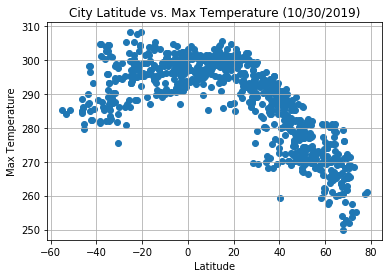

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max_Temperature"], marker="o")

d = datetime.datetime.today()

# Incorporate the other graph properties
title = 'City Latitude vs. Max Temperature ('+ str(d.month) +'/' + str(d.day)+'/' + str(d.year)+')'
plt.title(title)
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureandLatitudes.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

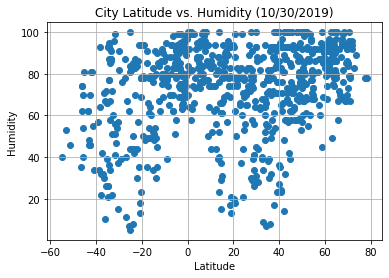

In [12]:
# Build a scatter plot for humidy and latitude
plt.scatter(weather_df["Lat"],weather_df["Humidity"],  marker="o")

# Incorporate the other graph properties
title = 'City Latitude vs. Humidity ('+ str(d.month) +'/' + str(d.day)+'/' + str(d.year)+')'
plt.title(title)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityandLatitudes.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

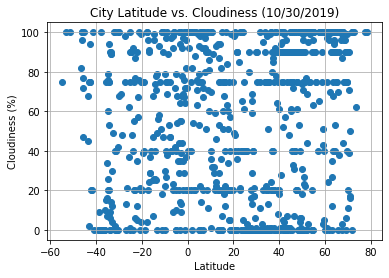

In [13]:
# Build a scatter plot for Cloudiness and latitude
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
title = 'City Latitude vs. Cloudiness ('+ str(d.month) +'/' + str(d.day)+'/' + str(d.year)+')'
plt.title(title)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessandLatitudes.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

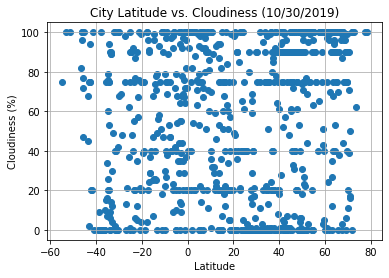

In [14]:
# Build a scatter plot for Cloudiness and latitude
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
title = 'City Latitude vs. Cloudiness ('+ str(d.month) +'/' + str(d.day)+'/' + str(d.year)+')'
plt.title(title)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessandLatitudes.png")

# Show plot
plt.show()